In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Time Analysis

In [3]:
time_df = pd.read_csv("time_data.csv")

In [4]:
time_df.describe().drop("count")

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Encryption_Time,Modified_AES_Decryption_Time
mean,0.002697,0.003159,0.000729,0.000501,0.000273,0.000274
std,0.000437,0.000552,0.000143,0.000103,0.000065,0.000060
min,0.002366,0.002736,0.000604,0.000410,0.000233,0.000235
25%,0.002457,0.002883,0.000639,0.000439,0.000241,0.000244
50%,0.002573,0.003019,0.000674,0.000465,0.000246,0.000249
75%,0.002817,0.003293,0.000772,0.000529,0.000288,0.000288
max,0.019054,0.030609,0.002674,0.001762,0.002441,0.001143


In [5]:
time_df.head(10)

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Encryption_Time,Modified_AES_Decryption_Time
0,0.002844,0.003551,0.001182,0.000556,0.000497,0.000266
1,0.002821,0.002878,0.000796,0.000440,0.000319,0.000250
2,0.003222,0.002891,0.000683,0.000435,0.000247,0.000253
3,0.003001,0.002876,0.000687,0.000489,0.000248,0.000353
4,0.002668,0.003352,0.000843,0.000484,0.000263,0.000249
5,0.002465,0.003223,0.000872,0.000471,0.000247,0.000249
6,0.002451,0.003295,0.000639,0.000479,0.000242,0.000249
7,0.002429,0.003516,0.000636,0.000488,0.000243,0.000274
8,0.002596,0.003369,0.000767,0.000480,0.000338,0.000248
9,0.002702,0.003576,0.000998,0.000474,0.000452,0.000252


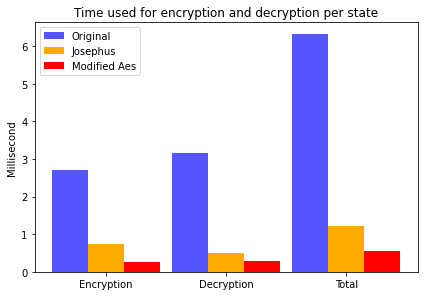

In [6]:
time_df_mean = time_df.mean()
labels = ["Encryption", "Decryption", "Total"]
bar_width = 0.3

fig, ax = plt.subplots()
x = np.arange(len(labels))

ax.bar(x - bar_width, 
       [time_df_mean['Original_AES_Encryption_Time']*1000,
        time_df_mean['Original_AES_Decryption_Time']*1000,
        (time_df_mean['Original_AES_Decryption_Time']+time_df_mean['Original_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Original', color='#5555FF')
ax.bar(x,
       [time_df_mean['Josephus_AES_Encryption_Time']*1000,
        time_df_mean['Josephus_AES_Decryption_Time']*1000,
        (time_df_mean['Josephus_AES_Encryption_Time']+time_df_mean['Josephus_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Josephus', color='#FFAA00')
ax.bar(x + bar_width,
       [time_df_mean['Modified_AES_Encryption_Time']*1000,
        time_df_mean['Modified_AES_Decryption_Time']*1000,
        (time_df_mean['Modified_AES_Encryption_Time']+time_df_mean['Modified_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Modified Aes', color='#FF0000')


ax.set_ylabel('Millisecond')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.title('Time used for encryption and decryption per state')
plt.show()

# Avalanche Analysis

In [7]:
avalanche_df = pd.read_csv("avalanche_data.csv")
avalanche_df["Original_AES_Avalanche"] = avalanche_df["Original_AES_Avalanche"].astype(float)*100
avalanche_df["Josephus_AES_Avalanche"] = avalanche_df["Josephus_AES_Avalanche"].astype(float)*100
avalanche_df["Modified_AES_Avalanche"] = avalanche_df["Modified_AES_Avalanche"].astype(float)*100

In [8]:
avalanche_df[["Original_AES_Avalanche","Josephus_AES_Avalanche"]].describe().drop("count")

,Original_AES_Avalanche,Josephus_AES_Avalanche
mean,50.117422,49.904688
std,4.385121,4.424533
min,29.687500,3.125000
25%,46.875000,46.875000
50%,50.000000,50.000000
75%,53.125000,53.125000
max,66.406250,67.968750


In [9]:
avalanche_df.head(10)

,Plaintext_1,Plaintext_2,Original_AES_Ciphertext_1,Original_AES_Ciphertext_2,Original_AES_Avalanche,Josephus_AES_Ciphertext_1,Josephus_AES_Ciphertext_2,Josephus_AES_Avalanche,Modified_AES_Ciphertext_1,Modified_AES_Ciphertext_2,Modified_AES_Avalanche
0,"-&D5,s!/PsPN<|mM",-&D5Ts!/PsPN<|mM,65a0083a4b0d3beeb3e76f6f30fb1528,bf09d965b1be1819f8c16a4ae580d231,55.46875,8bc17aba1e9bca5891856891e4266412,a8954fc4ec9bf3169699360d475e0312,44.53125,f8866b7d4b3d246806220c13cb0a5885,f8866b7df13d246806220c13cb0a5885,3.90625
1,e*7KTHdO!j~HV]CO,e*7KTHdO!j~HV]^O,40fbd87a0eef7c82004079dfbdd43d7d,bd2a91ec1d7da49ba6465e649d531345,46.09375,d2b7b49aa29ad2a4b056f11409f64ea0,89f2bd1753d6b3f52dd56ea0db2e1967,50.00000,3a28dd30f14bff8aa28ce633f9103ba0,3a28dd30f14bff8aa28ce633f9108ca0,4.68750
2,"7{Q7_K,,mxW{]tDw","7oQ7_K,,mxW{]tDw",cf065fb7de517c523ef898982e79c463,ded67af51ff9fcf519361daf4d6e3911,45.31250,f298e2a42208488bb3c3a3fa9178a621,3f72c4654193c4058d20e05a751245e7,50.00000,2a69ad0105cc7ad68974c3b39935de02,2a6dad0105cc7ad68974c3b39935de02,0.78125
3,"""&kv9VFndxEM(U[=","""&kv9VFndx9M(U[=",7c53dbd30bb761d218743bf13b942e85,c63087179da87b2e1273ad26a09d6016,50.00000,e1037fd837d9d12479ccecc4727e2999,99159f6b2587f70593d3baaba323b69e,50.78125,6a865b9e9593e5fc4274e17889fe873a,6a865b9e9593e5fc4274307889fe873a,3.12500
4,oX|cNC8_I$<j9^pc,oX|iNC8_I$<j9^pc,c7aac429a4dc3f64228e34771efcccc8,9a1802b5008cc06acf2c890627fd7ba9,51.56250,6ec539e116e49e1e3833ba78fea90daf,14daaa49adb9e2e2093e4f0e7a1d9e67,53.90625,a35a793d1b025e159c29a2d182bd8169,a35a79e11b025e159c29a2d182bd8169,3.90625
5,"DFRI;6wg69Nu'vi""","DFRI;6?g69Nu'vi""",5da25de37c639c5f31e64320f3d53ed7,7529ceed5e9daca2d6a6754d593e5d5b,50.00000,6aeaf0006ee80e83300b9fd117efbba5,555b81c395bb90bec262fe08798edc34,56.25000,d99f32a9fc3f0a9a76139bac84c09a41,d99f32a9fc3fbc9a76139bac84c09a41,3.90625
6,`EtK#pfWl-A`[?7V,`EtK`pfWl-A`[?7V,d7a15629aafb9e16563a55f6d637b006,c83f55e3162224c539db394c2a3c2cc6,54.68750,db4414e0b29e677f596c6a54db9de72c,7fa378c73566bf01ab564725132e537a,53.90625,f40b6730fb8620300ce9749f0d7e9d22,f40b6730458620300ce9749f0d7e9d22,4.68750
7,",[z>f)0QR+`H5d'.",P[z>f)0QR+`H5d'.,e8399ee93d0b4d1d5801897589969dc7,e1cd8257fcc019914d0ec574a5cbe495,44.53125,30d16b7c39edb9c70fa62faad450386f,ea771427a19a8211655cde78f967bc41,57.81250,96c944cc4e63f839c4bae7337db2109c,3fc944cc4e63f839c4bae7337db2109c,3.12500
8,B!9*Kz;P`IcDY?Vr,B!9*Kz;V`IcDY?Vr,92b563a491d9a0749e68c997e60a942f,b127715752a13f496c3f26adc4a6bdb9,52.34375,3e08ad7e307d6c439fcf565bf136e2eb,9fe88995e6a5c2f5096c5f4e52711dbc,52.34375,bd1ea318a8e8e310901ca9b40f7e60b5,bd1ea318a8e8e37c901ca9b40f7e60b5,3.12500
9,|*}SrOfhaV9M$<-{,|*}SrOfhaVQM$<-{,e74eca6aad8179951bb463e5c567249a,7c5014f58fb07e23c21de8b0018e80b5,52.34375,e1563194473f1697e215e08a3417cd4c,73bec9241f5b6b5c1527c008c2b1fe1d,48.43750,38289955efe52085b4c330788cc5656d,38289955efe52085b4c351788cc5656d,2.34375


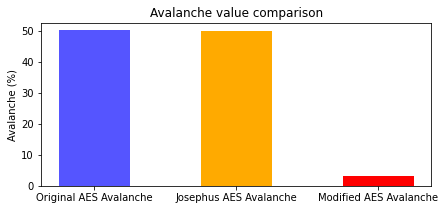

In [10]:
avalanche_df_mean = avalanche_df.mean()
plt.figure(figsize=(7,3))
plt.bar(['Original AES Avalanche', 
         'Josephus AES Avalanche',
         'Modified AES Avalanche'],
        [avalanche_df_mean['Original_AES_Avalanche'],
        avalanche_df_mean['Josephus_AES_Avalanche'],
        avalanche_df_mean['Modified_AES_Avalanche']]
       ,color=['#5555FF','#FFAA00','#FF0000']
       ,width=0.5)
plt.ylabel('Avalanche (%)')
plt.title('Avalanche value comparison')
plt.show()

In [11]:
avalanche_df_mean

Original_AES_Avalanche    50.117422
Josephus_AES_Avalanche    49.904688
Modified_AES_Avalanche     3.136797
dtype: float64